In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [7]:
df=pd.read_csv('data/stud.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [10]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [14]:
x=preprocessor.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape

(800, 19)

In [24]:
## create an evaluate function to give all the metrics after model training

def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    score=r2_score(true,predicted)
    return mse,mae,rmse,score

In [26]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "xgboost":XGBRegressor(),
}

res=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mse,model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    res.append({
        "Model":list(models.keys())[i],
        "Train R2":model_train_r2,
        "Test R2":model_test_r2
    })

    print(list(models.keys())[i])

    print("Model training performance")
    print("MSE:",model_train_mse)
    print("MAE:",model_train_mae)
    print("RMSE:",model_train_rmse)
    print("R2 score:",model_train_r2)

    print("---------------------------------------------------------------------------------------------")

    print("Model testing performance")
    print("MSE:",model_test_mse)
    print("MAE:",model_test_mae)
    print("RMSE:",model_test_rmse)
    print("R2 score:",model_test_r2)

    print("="*35)



LinearRegression
Model training performance
MSE: 28.4013037109375
MAE: 4.271484375
RMSE: 5.329287354885032
R2 score: 0.874022530822051
---------------------------------------------------------------------------------------------
Model testing performance
MSE: 29.43263671875
MAE: 4.2221875
RMSE: 5.425185408698029
R2 score: 0.8790464771743793
Lasso
Model training performance
MSE: 43.47840400585577
MAE: 5.206302661246526
RMSE: 6.593815587795565
R2 score: 0.8071462015863458
---------------------------------------------------------------------------------------------
Model testing performance
MSE: 42.5064168384116
MAE: 5.157881810347763
RMSE: 6.519694535667419
R2 score: 0.8253197323627853
Ridge
Model training performance
MSE: 28.33778823308244
MAE: 4.264987823725981
RMSE: 5.323324922741654
R2 score: 0.8743042615212909
---------------------------------------------------------------------------------------------
Model testing performance
MSE: 29.056272192348285
MAE: 4.21110068801426
RMSE: 5.3

In [27]:
results_df=pd.DataFrame(res)
sorted_df=results_df.sort_values(by=["Test R2"],ascending=False)

In [28]:
sorted_df

,Model,Train R2,Test R2
2,Ridge,0.874304,0.880593
0,LinearRegression,0.874023,0.879046
5,RandomForestRegressor,0.976847,0.853111
6,AdaBoostRegressor,0.846368,0.840956
7,xgboost,0.995500,0.827797
1,Lasso,0.807146,0.825320
3,KNeighborsRegressor,0.855488,0.783813
4,DecisionTreeRegressor,0.999653,0.748272


In [29]:
## Linear regression
linear=LinearRegression(fit_intercept=True)
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is: ",score)

Accuracy of the model is:  87.90464771743794


Text(0, 0.5, 'Predicted score')

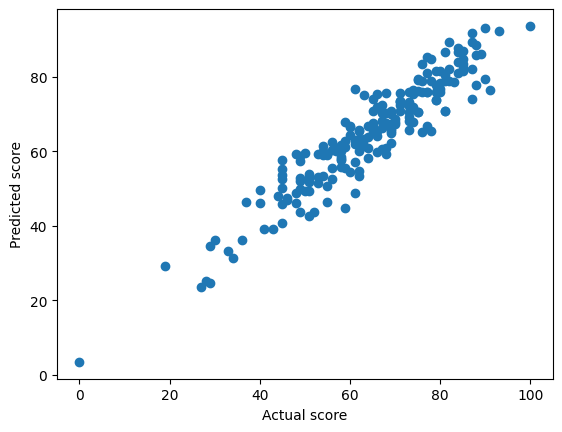

In [38]:
## plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")

<Axes: xlabel='math_score'>

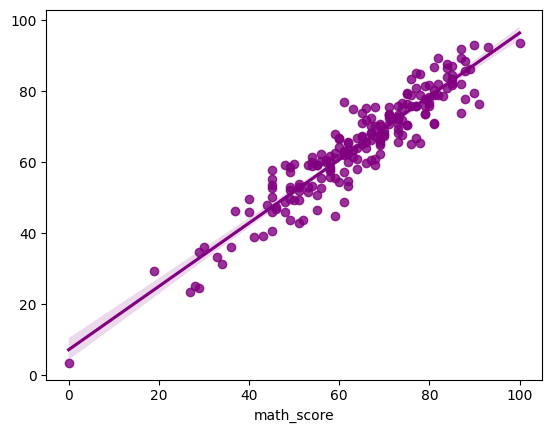

In [40]:
sns.regplot(x=y_test,y=y_pred,color='purple')

In [43]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
